Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
          Location  Wind Direction  ...  Pressure Conditions
0  Pune, MH, India            80.0  ...    1012.7      Clear
1  Pune, MH, India           102.5  ...    1013.9      Clear
2  Pune, MH, India           180.0  ...    1014.1      Clear
3  Pune, MH, India           230.0  ...    1013.1      Clear
4  Pune, MH, India            90.0  ...    1011.8      Clear

[5 rows x 16 columns]


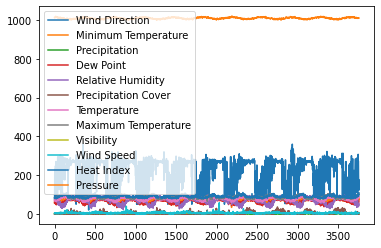

In [ ]:
from pandas import read_csv
import tensorflow as tf
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/BE_Datasets/'

series = read_csv(root_path + '10_Year_WindDataset.csv')
print(series.head())
# print(series.keys())

series.plot()
pyplot.show()

In [ ]:
uni_data = series['Wind Speed']
uni_data.index = series['Datetime']
uni_data.head()


Datetime
01/01/2010    2.2
01/02/2010    5.8
01/03/2010    2.2
01/04/2010    2.2
01/05/2010    3.4
Name: Wind Speed, dtype: float64

In [ ]:
uni_data.to_csv (root_path + 'wind_speed_only.csv', index = False, header=True)


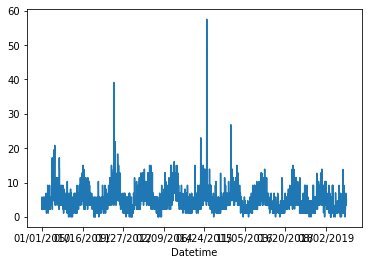

In [ ]:
uni_data.plot()
# fig= pyplot.figure(figsize=(12,9))
# axes= fig.add_axes([0.1,0.1,0.8,0.8])
# axes.plot(series['Datetime'],series['Wind Speed'])

pyplot.show()

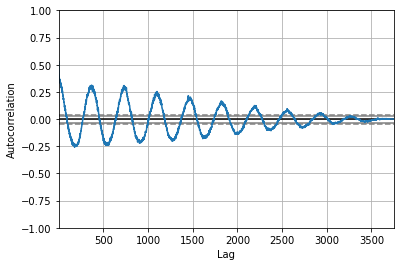

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')


autocorrelation_plot(uni_data[10:])
pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:           D.Wind Speed   No. Observations:                 3757
Model:                ARIMA(10, 1, 0)   Log Likelihood               -8650.047
Method:                       css-mle   S.D. of innovations              2.419
Date:                Fri, 19 Jun 2020   AIC                          17324.094
Time:                        13:44:25   BIC                          17398.871
Sample:                             1   HQIC                         17350.685
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003      0.009      0.038      0.970      -0.017       0.018
ar.L1.D.Wind Speed     -0.6794      0.016    -41.821      0.000      -0.711      -0.648
ar.L2.D.Wind Spe

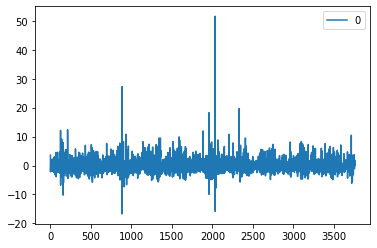

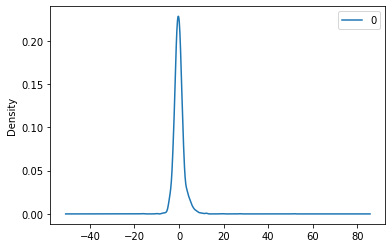

                 0
count  3757.000000
mean      0.000534
std       2.419517
min     -16.708234
25%      -1.299162
50%      -0.188533
75%       0.987275
max      51.566295


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

series = read_csv(root_path + 'wind_speed_only.csv')
# fit model
model = ARIMA(series, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=2.416020, expected=3.400000
predicted=2.608077, expected=1.100000
predicted=2.117397, expected=2.200000
predicted=2.213269, expected=0.000000
predicted=1.417797, expected=2.200000
predicted=1.873840, expected=3.400000
predicted=2.394505, expected=1.100000
predicted=1.505083, expected=2.200000
predicted=1.994344, expected=2.200000
predicted=1.924330, expected=2.200000
predicted=2.165796, expected=1.100000
predicted=1.849556, expected=1.100000
predicted=1.505939, expected=3.400000
predicted=2.343575, expected=3.400000
predicted=2.495179, expected=2.300000
predicted=2.291656, expected=3.400000
predicted=2.718990, expected=2.300000
predicted=2.545917, expected=3.400000
predicted=3.102269, expected=5.800000
predicted=4.017770, expected=1.100000
predicted=2.581875, expected=3.400000
predicted=3.306736, expected=2.200000
predicted=2.842485, expected=1.100000
predicted=2.327558, expected=3.400000
predicted=3.025235, expected=2.200000
predicted=2.184337, expected=3.400000
predicted=2.

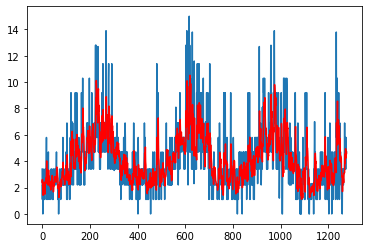

In [ ]:
import pickle

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

series = read_csv(root_path + 'wind_speed_only.csv')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

filename="ArimaModel.sav"
pickle.dump(model, open(root_path+filename, 'wb'))


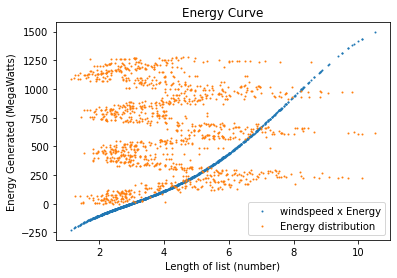

In [ ]:
# Energy Equation
a = -4.9402811920974 *100
b = 3.182165306441152*100
c = -8.549080998522270*10
d = 1.339672120726134*10
e =-6.119671606427594* (1/10)
y=list()

for x in predictions:
    if x<12:
      z= a+ b*x + c*x*x + d*x*x*x + e*x*x*x*x
    else:
      z=1500
    y.append(z[0])

m=list()
for i in range(len(predictions)):
    m.append(i)

# print(y)
pyplot.title("Energy Curve")
pyplot.xlabel("Length of list (number)")
pyplot.ylabel("Energy Generated (MegaWatts)")

pyplot.scatter(predictions,y,s=1,label="windspeed x Energy")
# pyplot.show()
pyplot.scatter(predictions,m,s=1,label="Energy distribution")
pyplot.legend()
pyplot.show()

In [ ]:
# load the model from disk
filename=""
loaded_model = pickle.load(open(root_path + filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)